In [2]:
import pandas as pd
from allensdk.api.queries.rma_api import RmaApi
import json

In [3]:
rma = RmaApi()

In [4]:
def query_structure_id(structure_acronym):
    query = rma.model_query('StructureLookup', criteria="structure[acronym$eq"+structure_acronym+"]",include="structure")[0]
    return query['structure']['id']

In [5]:
main_structure = "RSPagl"
main_structure_id = query_structure_id(main_structure)

In [6]:
path = "/home/ikharitonov/Desktop/data/connectivity/connectivity_target_experiment_lists/"
# path = "C:\\Users\\sarfi\\Desktop\\"

In [7]:
df = pd.read_csv(path+main_structure+".csv")
df

,id,transgenic-line,product-id,structure-id,structure-abbrev,structure-name,name,injection-volume,injection-structures,gender,strain,sum,structure-color,num-voxels,injection-coordinates,selected,experiment_page_url
0,512314723,Emx1-IRES-Cre,35,533,VISpm,posteromedial visual area,Emx1-IRES-Cre-234273,0.275993,"[{""id""=>385, ""abbreviation""=>""VISp"", ""name""=>""...",M,NaN,5.082025e-01,08858c,NaN,"[8480, 510, 4080]",False,http://connectivity.brain-map.org/projection/e...
1,267608343,Prkcd-GluCla-CFP-IRES-Cre,5,155,LD,Lateral dorsal nucleus of thalamus,Prkcd-GluCla-CFP-IRES-Cre-125,0.299917,"[{""id""=>155, ""abbreviation""=>""LD"", ""name""=>""La...",F,C57BL/6J,3.815785e-01,ff909f,NaN,"[6870, 2780, 7060]",False,http://connectivity.brain-map.org/projection/e...
2,571100135,Emx1-IRES-Cre,36,394,VISam,Anteromedial visual area,Emx1-IRES-Cre-294569,0.518470,"[{""id""=>394, ""abbreviation""=>""VISam"", ""name""=>...",M,NaN,3.743496e-01,08858c,NaN,"[8180, 570, 4120]",False,http://connectivity.brain-map.org/projection/e...
3,180296424,NaN,5,385,VISp,Primary visual area,378-1815,0.814006,"[{""id""=>385, ""abbreviation""=>""VISp"", ""name""=>""...",M,C57BL/6J,3.645531e-01,08858c,NaN,"[9290, 2220, 9410]",False,http://connectivity.brain-map.org/projection/e...
4,100141796,NaN,5,312782574,VISli,Laterointermediate area,378-796,0.178562,"[{""id""=>409, ""abbreviation""=>""VISl"", ""name""=>""...",M,C57BL/6J,3.644571e-01,08858c,NaN,"[9180, 2370, 9440]",False,http://connectivity.brain-map.org/projection/e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,304337288,Th-Cre_FI172,5,749,VTA,Ventral tegmental area,Th-Cre_FI172-135967,0.010615,"[{""id""=>128, ""abbreviation""=>""MRN"", ""name""=>""M...",F,B6.FVB,1.089119e-07,ff90ff,NaN,"[8410, 4830, 6180]",False,http://connectivity.brain-map.org/projection/e...
2895,125831616,NaN,5,951,PYR,Pyramus (VIII),378-1265,0.157833,"[{""id""=>944, ""abbreviation""=>""FOTU"", ""name""=>""...",M,C57BL/6J,9.928820e-08,fffc91,NaN,"[12830, 3150, 6300]",False,http://connectivity.brain-map.org/projection/e...
2896,277854916,Erbb4-T2A-CreERT2,5,693,VMH,Ventromedial hypothalamic nucleus,Erbb4-2A-CreERT2-D-5769,0.502381,"[{""id""=>1, ""abbreviation""=>""TMv"", ""name""=>""Tub...",M,C57BL/6J,3.300412e-08,ff4c3e,NaN,"[7350, 6660, 6370]",False,http://connectivity.brain-map.org/projection/e...
2897,310695955,Crh-IRES-Cre_ZJH,5,679,CS,Superior central nucleus raphe,Crh-IRES-Cre-125986,0.007551,"[{""id""=>146, ""abbreviation""=>""PRNr"", ""name""=>""...",F,C57BL/6J,2.488443e-08,ffc395,NaN,"[9830, 5230, 6000]",False,http://connectivity.brain-map.org/projection/e...


In [8]:
# https://allensdk.readthedocs.io/en/latest/_modules/allensdk/api/queries/mouse_connectivity_api.html#MouseConnectivityApi.get_structure_unionizes
# using this approach, unionized data would have to be downloaded for every experiment (might take a lot of time e.g. 1855 experiments for RSPagl)
pd.DataFrame(rma.model_query("ProjectionStructureUnionize", criteria="section_data_set[id$eq512315551]", include="structure[id$eq894]"))

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,section_data_set_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume,structure
0,2,640689589,False,0.696321,6920,350,6900,0.013240,0.016449,9.820845,597.049358,0.021373,512315551,894,1.216443e+11,1.060688e+09,1.041685e+10,1.744722e+07,1.299343,"{'acronym': 'RSPagl', 'atlas_id': 394, 'color_..."
1,1,640690929,True,1.000000,10220,1590,3510,0.056853,0.999967,12032.166605,12032.561016,0.091773,512315551,894,9.014689e+11,7.491925e+07,9.014408e+11,7.491679e+07,0.091776,"{'acronym': 'RSPagl', 'atlas_id': 394, 'color_..."
2,1,640690930,False,1.000000,9720,1630,3410,0.068989,0.099411,206.254527,2074.762553,0.111363,512315551,894,3.327241e+11,9.144732e+08,1.886142e+11,9.090883e+07,1.120230,"{'acronym': 'RSPagl', 'atlas_id': 394, 'color_..."
3,3,640692609,True,1.000000,10220,1590,3510,0.056853,0.999967,12032.166605,12032.561016,0.091773,512315551,894,9.014689e+11,7.491925e+07,9.014408e+11,7.491679e+07,0.091776,"{'acronym': 'RSPagl', 'atlas_id': 394, 'color_..."
4,3,640692612,False,1.000000,9720,1630,3410,0.082229,0.054859,100.767021,1836.824888,0.132736,512315551,894,4.543683e+11,1.975161e+09,1.990311e+11,1.083561e+08,2.419572,"{'acronym': 'RSPagl', 'atlas_id': 394, 'color_..."


### Goal: Get the list of all brain areas, choose experiments with injections in each brain area which project to V2m structures (above), filter out structures where injection sites include target area, from these experiments get structure unionize data at each V2m area [repeat for every brain area]

In [9]:
struct_set_id = 167587189 # Curated list of non-overlapping substructures at a mid-ontology level

In [10]:
struct_set = pd.DataFrame(rma.model_query('Structure', criteria="structure_sets[id$eq"+str(struct_set_id)+"]", start_row=0, num_rows='all'))
struct_set

,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,...,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
0,PAG,240.0,FF90FF,5,False,734881840,1,838,3,795,...,None,None,1,323,Periaqueductal gray,839,8,/997/8/343/313/323/795/,3260726339,8690
1,ARH,27.0,FF5D50,6,False,734881840,1,733,3,223,...,None,None,1,157,Arcuate hypothalamic nucleus,734,8,/997/8/343/1129/1097/157/223/,218062747,8690
2,ORBm,232.0,248A5E,7,False,734881840,1,264,3,731,...,None,None,1,714,Orbital area medial part,265,9,/997/8/567/688/695/315/714/731/,3012751712,8690
3,LSv,174.0,90CBED,7,False,734881840,1,589,3,266,...,None,None,1,242,Lateral septal nucleus ventral part,590,9,/997/8/567/623/477/275/242/266/,1660459064,8690
4,PD,255.0,FF5547,6,False,734881840,1,746,3,914,...,None,None,1,141,Posterodorsal preoptic nucleus,747,8,/997/8/343/1129/1097/141/914/,2759126254,8690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,SSp-bfd,748.0,188064,8,False,734881840,1,51,3,329,...,None,None,1,322,Primary somatosensory area barrel field,52,9,/997/8/567/688/695/315/453/322/329/,3406319794,8690
312,OT,235.0,80CDF8,6,False,734881840,1,577,3,754,...,None,None,1,493,Olfactory tubercle,578,8,/997/8/567/623/477/493/754/,1598442672,8690
313,SubG,464.0,FF909F,7,False,734881840,1,710,3,321,...,None,None,1,1014,Subgeniculate nucleus,711,8,/997/8/343/1129/549/856/1014/321/,3545734096,8690
314,SNr,330.0,FF90FF,5,False,734881840,1,822,3,381,...,None,None,1,323,Substantia nigra reticular part,823,8,/997/8/343/313/323/381/,1375238552,8690


In [11]:
# SANITY CHECK

# make a copy of experiment df
unmatched_df = df.copy()
num_collected_exps = 0

# loop through brain areas, removing experiments successfully matching with an area
for area_id in struct_set['id']:
    indexes_to_drop = df.index[df['structure-id']==area_id]
    num_collected_exps += len(indexes_to_drop)
    unmatched_df = unmatched_df.drop(indexes_to_drop)
    # if area_id == 329: break

# display df with unmatched experiments
print(num_collected_exps)
unmatched_df

2899


,id,transgenic-line,product-id,structure-id,structure-abbrev,structure-name,name,injection-volume,injection-structures,gender,strain,sum,structure-color,num-voxels,injection-coordinates,selected,experiment_page_url


dataframe is empty

167587189 -> sanity checked -> all experiments, from corresponding metadata downloaded in csv in connectivity_target_experiment_lists, are assigned to an area -> no missed experiments due to injection area (labelling convention) mismatch

In [12]:
# Number of experiments from injections across all brain areas targeting RSPagl
total_num_collected_exps = 0
area_experiment_id_dict = {}

for area_id in struct_set['id']:
    total_num_collected_exps += len(df[df['structure-id']==area_id])
    area_experiment_id_dict[area_id] = list(df[df['structure-id']==area_id]['id'])
    # print("Experiments in area",struct_set[struct_set['id']==area_id]['acronym'].item(),"=", len(df[df['structure-id']==area_id]))
print(total_num_collected_exps,"experiments collected in the dictionary")
print(len(area_experiment_id_dict),"number of areas collected in the dictionary")
print("area",795)
print(area_experiment_id_dict[795])
print("area",223)
print(area_experiment_id_dict[223])

2899 experiments collected in the dictionary
316 number of areas collected in the dictionary
area 795
[300076066, 272699357, 267029447, 287247978, 266500714, 496114558, 272829745, 120761491, 266099165, 156979283, 302053755, 162020630, 287712779, 182144176, 301540850, 300166697, 160538548, 158376179, 147635309, 113096571, 300111793, 128002057, 120571672, 180524412, 298079928, 182280207, 304949216, 262188772, 299856390, 267030155, 301671287, 301541824, 543880631, 114155923, 292624169]
area 223
[263369222, 171482142, 175738378, 146554676, 241278553, 178282527, 286726777, 232311236, 181891892, 158142090, 286318327, 176431817, 146660999, 232310521, 586447435, 298105299, 159751184]


In [13]:
# Filtering out experiments with overlapping injection and target structures

filtered_area_experiment_id_dict = {}
exps_removed = []

for area_id, exps in area_experiment_id_dict.items():
    # if a V2m structure id is contained in injection-structures of an experiment, drop that experiment (id) from area_experiment_id_dict
    exps_ids_to_retain = []
    for exp_id in exps:
        # Loading and formatting dictionary with experiment's injection structures from Allen metadata
        inj_structs_dict = json.loads(df[df['id']==exp_id]['injection-structures'].item().replace("=>",":"))
        # Getting ids of experiment's injection structures
        inj_structs_id_list = [x['id'] for x in inj_structs_dict]
        if main_structure_id in inj_structs_id_list: exps_removed.append(exp_id)
        else: exps_ids_to_retain.append(exp_id)
        # print(inj_structs_id_list)
        # break
    filtered_area_experiment_id_dict[area_id] = exps_ids_to_retain
print(len(exps_removed),"experiments removed:")
print(exps_removed)

140 experiments removed:
[593277684, 591224520, 297671724, 180720175, 173206592, 126852363, 292124765, 304641170, 299784429, 112595376, 496113850, 292373346, 303784745, 531443949, 176497015, 599076623, 561307215, 606778738, 304694156, 147789031, 305235787, 303535867, 575782182, 646525156, 562674923, 557187751, 646525997, 576341623, 576036240, 112229103, 593018150, 168164230, 617901499, 495345959, 614094233, 553746532, 264249312, 595884140, 557827228, 267032286, 572595932, 604100536, 573331541, 585021827, 595259180, 643635656, 585760423, 599136295, 577298618, 554333581, 288168426, 126862385, 479984127, 113887868, 546103149, 584511827, 512315551, 272782668, 501115762, 536298726, 601476074, 298404860, 554641575, 174361040, 591169915, 603479758, 286302294, 560725737, 510835921, 593016678, 298759552, 517077687, 294484177, 606929366, 268320515, 524666049, 657046319, 574950390, 526502209, 510417993, 510417255, 482640524, 566732238, 523714193, 539514325, 544488252, 514332492, 580150240, 585910

In [14]:
df[df['id']==300076066]

,id,transgenic-line,product-id,structure-id,structure-abbrev,structure-name,name,injection-volume,injection-structures,gender,strain,sum,structure-color,num-voxels,injection-coordinates,selected,experiment_page_url
946,300076066,Dbh-Cre_KH212,5,795,PAG,Periaqueductal gray,Dbh-Cre_KH212-125311,0.013064,"[{""id""=>162, ""abbreviation""=>""LDT"", ""name""=>""L...",F,C57BL/6J,0.002407,ff90ff,NaN,"[9940, 3700, 6280]",False,http://connectivity.brain-map.org/projection/e...


### Goal: For every brain area compute average projection metric over all relevant injection experiments, include choices for hemisphere, threshold (?), etc

#### coordinates

In [15]:
# trying to get the hemisphere of the injection site for each experiment - to make sure the uniuonized data pulled later will be from the same hemisphere as injection

In [16]:
# COORDINATES APPROACH

In [17]:
# https://community.brain-map.org/t/injection-site-coordinates/1444/2
# GET DIMENSION RANGES THROUGH REFERENCE SPACE https://allensdk.readthedocs.io/en/latest/_static/examples/nb/reference_space.html

In [18]:
from allensdk.core.reference_space_cache import ReferenceSpaceCache

In [19]:
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest=Path(output_dir) / 'manifest.json')

NameError: name 'resolution' is not defined

In [20]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
mcc = MouseConnectivityCache()
# reference_space = mcc.get_reference_space()

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

In [21]:
print(template.shape)

(528, 320, 456)


In [22]:
import matplotlib.pyplot as plt

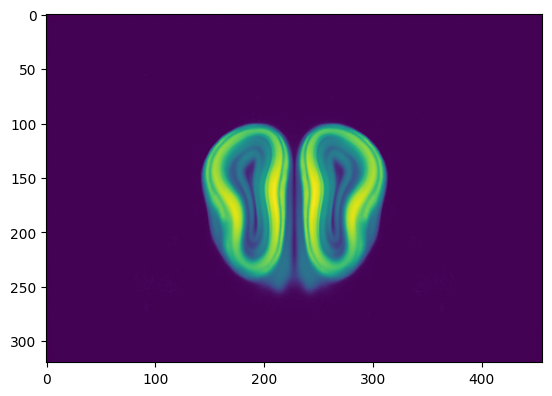

In [23]:
plt.imshow(template[50])

#### querying experiments

In [24]:
print(filtered_area_experiment_id_dict[795][0])
temp_data = pd.DataFrame(rma.model_query("ProjectionStructureUnionize", criteria="[is_injection$eqtrue][section_data_set_id$eq"+str(filtered_area_experiment_id_dict[795][0])+"]"))
temp_data[temp_data['structure_id']==795]

300076066


,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,section_data_set_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
7,3,632677046,True,0.999331,9940,3700,6280,0.74058,0.117682,484.604706,4117.916731,0.009675,300076066,795,6.212291e+10,67112528.0,3.252305e+10,7897937.0,0.082213


In [25]:
print(filtered_area_experiment_id_dict[795][1])
temp_data = pd.DataFrame(rma.model_query("ProjectionStructureUnionize", criteria="[is_injection$eqtrue][section_data_set_id$eq"+str(filtered_area_experiment_id_dict[795][1])+"]"))
temp_data[temp_data['structure_id']==795]
# temp_data[temp_data['structure_id']==795][['hemisphere_id','normalized_projection_volume','structure_id','max_voxel_x','max_voxel_y','max_voxel_z']].to_html()

272699357


,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,section_data_set_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
8,1,631426216,True,1.0,9570,3110,5640,0.043593,0.219882,526.850403,2396.061768,0.005539,272699357,795,1.742240e+10,20564912.0,1.083463e+10,4521850.5,0.025192
43,3,631428678,True,1.0,9570,3110,5640,0.689372,0.387895,1843.093537,4751.526546,0.087598,272699357,795,3.966732e+11,184349808.0,3.397739e+11,71508374.5,0.225829


In [26]:
print(filtered_area_experiment_id_dict[795][2])
temp_data = pd.DataFrame(rma.model_query("ProjectionStructureUnionize", criteria="[is_injection$eqtrue][section_data_set_id$eq"+str(filtered_area_experiment_id_dict[795][2])+"]"))
temp_data[temp_data['structure_id']==795]
# temp_data[temp_data['structure_id']==795][['hemisphere_id','normalized_projection_volume','structure_id','max_voxel_x','max_voxel_y','max_voxel_z']].to_html()

267029447


,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,section_data_set_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
26,2,631122979,True,1.0,8620,3820,5870,0.814914,0.331274,391.437500,1181.613647,0.035825,267029447,795,4.430328e+10,88280768.0,3.455640e+10,29245096.0,0.108144
44,3,631127818,True,1.0,8620,3820,5870,0.814914,0.331274,391.437507,1181.613619,0.035825,267029447,795,4.430328e+10,88280768.0,3.455640e+10,29245096.0,0.108144


In [65]:
def query_s_acronym(s_id):
    query = rma.model_query('StructureLookup', criteria="structure[id$eq"+str(s_id)+"]",include="structure")[0]
    return query['structure']
def query_s_id(s_acronym):
    query = rma.model_query('StructureLookup', criteria="structure[acronym$eq"+str(s_acronym)+"]",include="structure")[0]
    return query['structure']
def query_s_path_acronyms(acr):
    return '/'.join([query_s_acronym(int(x))['acronym'] for x in query_s_id(acr)['structure_id_path'].split('/')[1:-1]])

In [70]:
query_s_path_acronyms('VISpm6b')

'root/grey/CH/CTX/CTXpl/Isocortex/VIS/VISpm/VISpm6b'

In [34]:
for e in filtered_area_experiment_id_dict[795]:
    data = pd.DataFrame(rma.model_query("ProjectionStructureUnionize", criteria="[is_injection$eqfalse][section_data_set_id$eq"+str(e)+"]"))
    # print(data[data['structure_id']==main_structure_id])
    print("experiment",e)
    print([query_s_acronym(x) for x in list(data['structure_id'])])
# 633386929 only non zero for RSPagl

experiment 300076066
['RSPv2/3', 'AUDv4', 'tspd', 'HATA', 'VERM', 'PDTg', 'lotd', 'RSPd1', 'RSPv5', 'IG', 'IPC', 'VAL', 'dhc', 'SS', 'ECT6b', 'LGd', 'TRN', 'AOBmi', 'EPd', 'MOs2/3', 'VISp4', 'VISl', 'CLA', 'AIp', 'SSp-m', 'AUDv2/3', 'mct', 'ACAd1', 'LPO', 'LRN', 'SSp-ll6a', 'POR', 'AUDd', 'ND', 'ME', 'ILA6b', 'AUDd5', 'PCG', 'AIp6a', 'PPY', 'chpl', 'ccb', 'PGRN', 'LAT', 'RSPd', 'fxs', 'AOBgl', 'IMD', 'TMd', 'cst']
experiment 272699357
['tb', 'ORBm', 'PHY', 'CA2', 'SSp-n', 'MOs6b', 'fx', 'SSp-ul2/3', 'VISli', 'AId1', 'GU2/3', 'AUD', 'SSp-n4', 'BMAa', 'GU4', 'och', 'ECT6a', 'PSTN', 'PGRNl', 'LAV', 'SSp-ll6b', 'SCiw', 'AUDv', 'AUDv6b', 'BLAp', 'y', 'SSp-tr4', 'AUDv6b', 'df', 'VISrl5', 'V3', 'MEV', 'VISrl2/3', 'SEZ', 'AUDd1', 'EW', 'MOs6b', 'MT', 'POST', 'NLOT2', 'PPT', 'V', 'NTS', 'HPF', 'CA', 'MOp', 'APr', 'grey', 'BMAp', 'CTXsp']
experiment 267029447
['sV', 'AId5', 'scp', 'ANcr2', 'ILA5', 'MOB', 'FC', 'MMd', 'VISam5', 'PRE', 'VPL', 'grey', 'AVPV', 'DG-sg', 'GRN', 'SSp-n6b', 'VISpl6a', '

KeyboardInterrupt: 

#### getting experiments from mcc

In [ ]:
# https://allensdk.readthedocs.io/en/latest/_static/examples/nb/mouse_connectivity.html
# https://allensdk.readthedocs.io/en/latest/allensdk.core.mouse_connectivity_cache.html

In [71]:
structure_unionizes = mcc.get_structure_unionizes([ e for e in df['id'] ], 
                                                  is_injection=False,
                                                  structure_ids=[query_s_id('RSPagl')['id']],
                                                  include_descendants=True,
                                                  hemisphere_ids=[1])

KeyboardInterrupt: 

In [72]:
structure_unionizes.head()

NameError: name 'structure_unionizes' is not defined

### Goal: compute centre of mass location, display the average datapoint in brainrender